In [1]:
using Plots,Statistics
include("../src/test.jl")
include("../src/io.jl")

makeCoordinates (generic function with 1 method)

In [2]:
ls,ts_mean,ts_error,minfs_mean,minfs_error, ts_table, minfs_table,accepted_moves_table = readLSimulation("../outputs/help4",verbose=false)
p = plot(legend=false)
title!("Annealing para nudo cuadrado. T_i = 0.5")
xlabel!("ls")
ylabel!("demaineEnergy1")
ylims!(35,50)
plot!([sqrt(2),sqrt(2)],[35,50],ls=:dash,color="black")
scatter!(ls,minfs_mean,yerror=minfs_error)
display(p)

MethodError: MethodError: no method matching readLSimulation(::String; verbose=false)
Closest candidates are:
  readLSimulation(::AbstractString, !Matched::Real; verbose) at c:\Users\sayeg\Insync\sayeg@ciencias.unam.mx\Google Drive\Backup\Maestria\tesis\geometricProteinFolding\src\io.jl:128

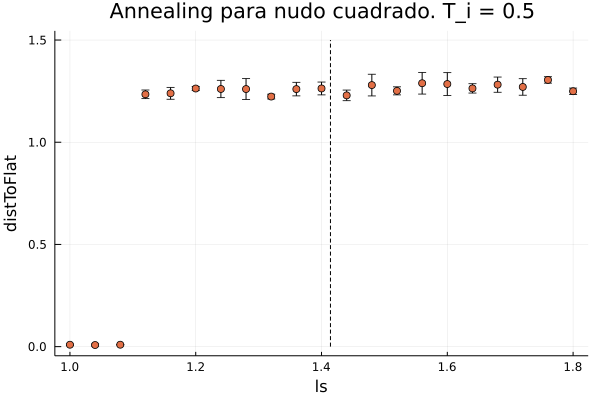

In [3]:
ls,ts_mean,ts_error,minfs_mean,minfs_error, ts_table, minfs_table,accepted_moves_table = readLSimulation("../outputs/help5",verbose=false)
p = plot(legend=false)
title!("Annealing para nudo cuadrado. T_i = 0.5")
xlabel!("ls")
ylabel!("distToFlat")
plot!([sqrt(2),sqrt(2)],[0,1.5],ls=:dash,color="black")
scatter!(ls,minfs_mean,yerror=minfs_error)
display(p)

In [4]:
Q, lastQ, ang_idxs, ang_vals = readSingleSimulation("../outputs/help4/07_1");
lengths,b_angles,d_angles = lengthsAndAngles(Q);

In [5]:
full_diheds = zeros(length(ang_idxs)+1,length(d_angles))
full_diheds[1,:] = d_angles
for i in 2:length(ang_idxs)+1
    if ang_idxs[i-1] != 0
        full_diheds[i,:] = full_diheds[i-1,:]
        # updating new value
        full_diheds[i,ang_idxs[i-1]] += ang_vals[i-1]
    else
        full_diheds[i,:] = full_diheds[i-1,:]  
    end
end

In [17]:
minimum([1,2,3])

1

In [18]:
function normalize(arr::Array{<:Number,1})
    min = minimum(arr)
    max = maximum(arr)
    return [(x-min)/(max-min) for x in arr]
end

normalize (generic function with 1 method)

In [19]:
function standarize(arr::Array{<:Number,1})
    mu = Statistics.mean(arr)
    err = Statistics.std(arr)
    return [(x-mu)/err for x in arr]
end

standarize (generic function with 1 method)

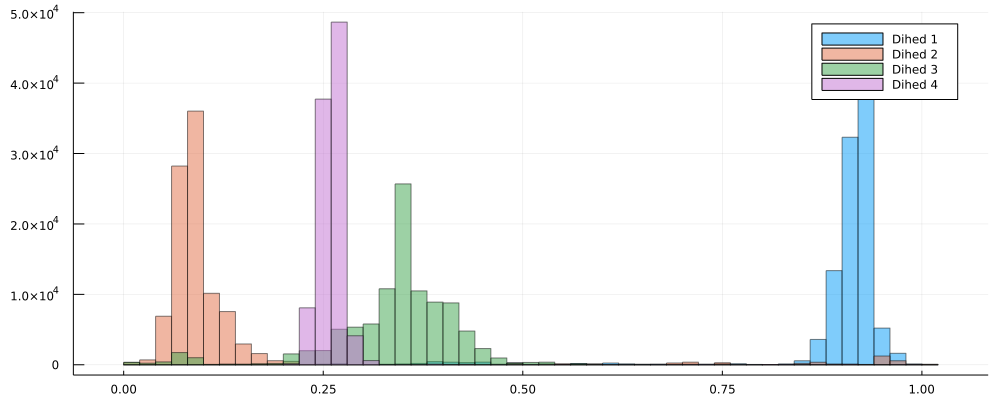

In [22]:
p = plot(size=(1000,400))
for i in 1:size(full_diheds)[2]
    #arr = standarize(full_diheds[:,i])
    arr = normalize(full_diheds[:,i])
    histogram!(arr,bins=60,label="Dihed $(i)",alpha=0.5)
end
display(p)

search: histogram histogram! histogram2d histogram2d!



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
julia> histogram([1,2,1,1,4,3,8],bins=0:8,weights=weights([4,7,3,9,12,2,6]))
```
